In [1]:
# Primary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Custom functions
from src import helpers

# Linear Regression Practice

A dataset called `diabetes.csv` is stored in the `data` folder for this repository. 

In the cell below, read in the dataset using pandas, and output the head of the dataframe. Assign the dataframe to the variable `df`.

In [2]:
df = pd.read_csv('data/diabetes.csv')

**Each row in this dataset represents a patient with diabetes.** 

For this assignment, the variables of focus will be:
* age
* sex
* bmi
* bp
* target

<details>
    <summary>
        <i>Click here to view the documentation for the dataset
        </i>
    </summary>
    <h1>Diabetes dataset</h1>
    <p>


Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)
    
  </p>
</details>

In [3]:
df = df[['target', 'age', 'sex', 'bmi', 'bp']]
df.head(2)

,target,age,sex,bmi,bp
0,151.0,0.038076,1,0.061696,0.021872
1,75.0,-0.001882,0,-0.051474,-0.026328


In [4]:
# Run this cell unchanged
helpers.independent.display()

**For our first model, let's figure out which column is most correlated with the target.**

In the cell below,

* Identify the most correlated feature with the target column.
* Assign the name of the column to the variable `most_correlated`.

In [5]:
most_correlated = df.corr().sort_values('target').iloc[-2].name

In [6]:
# Run this cell unchanged!
helpers.correlation.display()

In [7]:
# Run this cell unchanged!
helpers.correlation_strong.display()

Let's create a model using the most correlated feature as the only predictor.

## There are two main ways of creating a linear regression model when using `statsmodels`. 
### 1. The pythonic way
   - For this approach you will typically see statsmodels imported with the line `import statsmodels.api as sm`
   - Using this approach, you create the model by passing the actual data objects into the model like so..
        
        --------------
        ```python
        model = sm.OLS(df.target, df.bmi)
        model_results = model.fit()
        ```
        --------------
       
       
   - This approach can be handy when you have a lot a features and do not wish to type the name of each column because you can pass in an entire dataframe of predictors.
   - One small annoyance with this approach is that the model does not use an intercept by default so you typically have to add the intercept manually
    
    
    --------------
    ```python
    model = sm.OLS(df.target, df[['bmi']].assign(intercept=1))
    model_results = model.fit()
    ```
    
    ----------------
    
### 2. The `R` formula way
   - For this approach you will typically see statsmodels imported with the line `import statsmodels.formula.api as smf`
   - Using this approach, you write your linear equation as a string with the following format:
    
```python
'{dependent_variable} ~ {independent_variable_1} + ... {indepdendent_variable_n}'
```
        
   - In this case, with a dependent variable of `target` and a single independent variable of `bmi`, our formula looks like this:
   ```python
    'target ~ bmi'
    ```
   - And the full modeling code looks like this:
   
   --------
   
```python
formula = 'target ~ bmi'
model = smf.ols(formula, data=df)
model_results = model.fit()
```
    
   --------
    
   - Using this approach, the intercept is added by default
   - One downside of this approach is that writing the formula can be a little cumbersome when you have a lot of features
   
   
## tl;dr There are multiple ways of creating a model, but either option works perfectly fine. 

In this notebook, we will focus on using the `R` formula method for the following reasons:
1. This bootcamp focuses primarily on  *Ordinary Least Squares Linear Regression*, but there are some more advanced versions of linear regression in statsmodels that are only supported by the formula approach. Because of this, familiarity with the formula technique is highly encouraged.
2. The formula approach adds an intercept term by default which is extremely convenient!

**In the cell below, write the formula for our first linear regression model and assign the string to a variable called `formula1`.**

In [8]:
formula1 = 'target ~ bmi'

Let's fit the model and interpret the results!

In [9]:
model1 = smf.ols(formula1, df).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,152.1335,2.974,51.162,0.000,146.289,157.978
bmi,949.4353,62.515,15.187,0.000,826.570,1072.301


**Using the table above, we have all the information we need to write a linear equation.**

Intercept = 152.1335

Slope = 949.4353

Linear Equation:  $target = 152.1335 + 949.4353bmi$

## Interpret the numbers

#### Interpreting the intercept

In [10]:
# Run this cell unchanged
helpers.intercept.display()

#### Interpret the slope

In [11]:
# Run this cell unchanged
helpers.slope.display()

## Evaluate the model

In the cell below,
1. Import `r2_score` and `mean_squared_error` from the sklearn metrics module.
2. Calculate the r2 and RMSE for the model.

In [12]:
# Import r2_score and mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

# Calculate r2
model1_r2 = r2_score(df.target, model1.predict())

# Calculate RMSE
model1_rmse = mean_squared_error(df.target, model1.predict(), squared=False)

# Print Results
print('Model R^2: ', model1_r2)
print('Model RMSE:', model1_rmse)

Model R^2:  0.3439237602253803
Model RMSE: 62.37352471570989


### Interpret the r2 and RMSE metrics



The regression model `target ~ bmi` explains about 34% of the variance in the dependent variable. The predictions generated by this model have an average error 62.

### Check assumptions of Linear Regression

**Investigating Linearity**

First, let's check whether the linearity assumption holds.

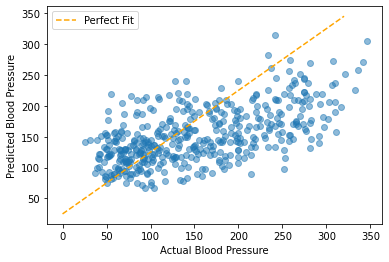

In [13]:
# Import matplotlib using the standard alias
import matplotlib.pyplot as plt

# Generate model predictions
preds = model1.predict()
# Create a matplotlib subplot
fig, ax = plt.subplots()

# Using numpy.arange create a line that
# begins with the minimum target value
# and ends with the maximum target value
perfect_line = np.arange(df.target.min(), df.target.max())

# Plot the `perfect_line`
# Set the label to the string "Perfect Fit"
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")

# Plot a scatter plot setting the xaxis to 
# the true target values and the yaxis to
# the predicted valued
ax.scatter(df.target, preds, alpha=0.5)

# Set the xlabel to the string "Actual Blood Pressure"
ax.set_xlabel("Actual Blood Pressure")

# Set the ylabel to the string "Predicted Blood Pressure"
ax.set_ylabel("Predicted Blood Pressure")

# Activate the legend for the matplotlib axis
ax.legend();

Are you violating the linearity assumption?


Yes. The predictions generated by this model are deviating from a linear relationship. At low blood pressure levels, the model appears to be mostly overpredicting, and is dramatically underpredicting beyond a blood pressure of ~125.

**Investigating Normality**

/Users/joel/opt/anaconda3/envs/python3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


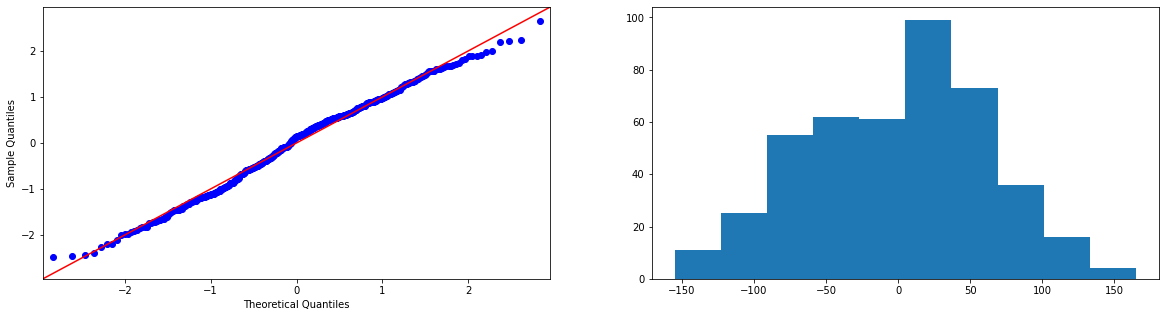

In [14]:
from scipy.stats import norm

fig, axes = plt.subplots(1,2, figsize=(20,5))
residuals = preds-df.target
sm.graphics.qqplot(residuals, dist=norm, line='45', fit=True, ax=axes[0])
axes[1].hist(residuals);

**Investigating Equal Variance**

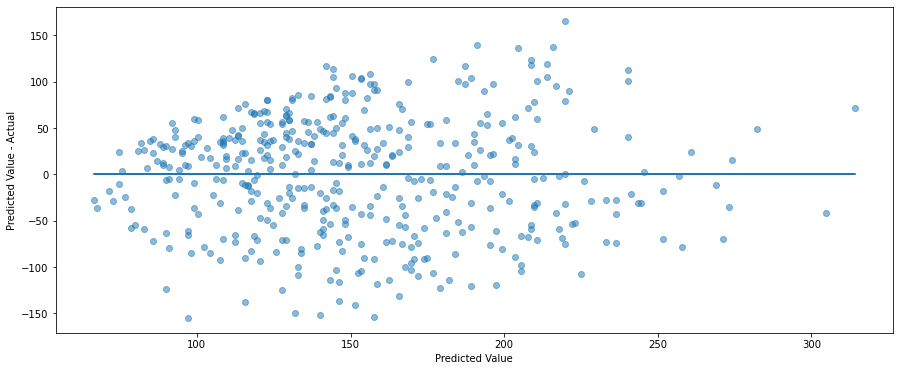

In [15]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(df))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Predicted Value - Actual");

Are you violating the equal variance assumption?


This doesn't look to bad, but there is some evidence of heteroscedasticty. As we saw from this linearity plot, our model is mostly overestimating or underestimating, which is reflected in this plot. The data appears to be a bit more densly distributed at lower values and it becoming more widley distributes as the predicted values increase. The overall variance, however seems to be largly consistent. As the predicted values increase, we do not see a widening of distribution but moreso a change in the mean of the residuals (This again, is better demonstrated by our violation of linearity)

### Multiple Linear Regression

In the cell below, define fit a linear regression using `bmi` and `bp` as independent variables.

In [16]:
formula2 = 'target~bmi + bp'

model2 = smf.ols(formula2, df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           8.68e-49
Time:                        14:29:55   Log-Likelihood:                -2435.7
No. Observations:                 442   AIC:                             4877.
Df Residuals:                     439   BIC:                             4890.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.856     53.261      0.000     146.520     157.747
bmi          790.3966     65.380     12.089      0.000     661.901     918.892
bp           402.2067     65.380      6.152      0.000     273.711     530.703
==============================================================================
Omnibus:                       12.428   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.822
Skew:                           0.171   Prob(JB):                       0.0200
Kurtosis:                       2.446   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Define a function to calculate the `r2` and `mean squared error`

In [17]:
def metrics(model, target):
    # Generate model predictions
    preds = model.predict()
    # Calcuate r2
    r2 = r2_score(target, preds)
    # Calculate rmse
    rmse = mean_squared_error(target, preds, squared=False)
    # Return r2 and rmse
    return r2, rmse

In [18]:
model2_r2, model2_rmse = metrics(model2, df.target)

# Print Results
print('Model1 R^2:', model1_r2)
print('Model2 RMSE:', model2_rmse)
print('-------------------------------')

print('Model R^2: ', model2_r2)
print('Model RMSE:', model2_rmse)

Model1 R^2: 0.3439237602253803
Model2 RMSE: 59.84718212461125
-------------------------------
Model R^2:  0.39599414313715675
Model RMSE: 59.84718212461125


### Define a function to plot linearity

In [19]:
def linearity(model, target):
    # Generate model predictions
    preds = model.predict()
    # Create a matplotlib subplot object
    fig, ax = plt.subplots()
    # Generate a line beginning with target min and
    # ending with target max
    perfect_line = np.arange(target.min(), target.max())
    # Plot the perfect line
    ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
    # Plot a scatter plot with the target as the xaxis and preds as the yaxis
    ax.scatter(target, preds, alpha=0.5)
    # Set the x and y axis labels
    ax.set_xlabel("Actual Blood Pressure")
    ax.set_ylabel("Predicted Blood Pressure")
    # Activate the axis legend
    ax.legend();

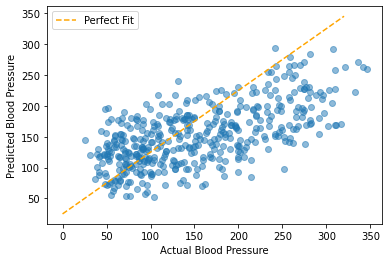

In [20]:
linearity(model2, df.target)

### Define a function to plot residual normality.

In [21]:
def normality(model, target):
    # Initialize a matplotlib subplot
    fig, axes = plt.subplots(1,2, figsize=(20,5))
    # Generate model predictions
    preds = model.predict()
    # Calculate error
    residuals = preds - target
    # Plot the residuals as a qqplot
    sm.graphics.qqplot(residuals, dist=norm, line='45', fit=True, ax=axes[0])
    # Plot a histogram
    axes[1].hist(residuals);

/Users/joel/opt/anaconda3/envs/python3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


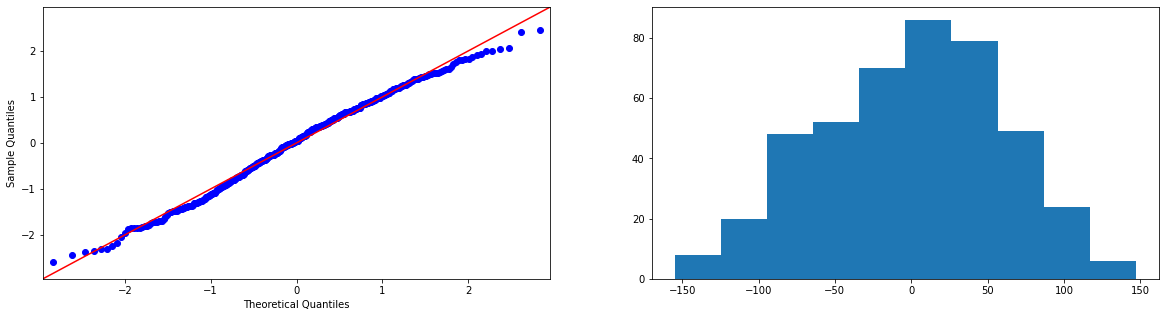

In [22]:
normality(model2, df.target)

### Define a function to plot equal_variance

In [23]:
def equal_var(model, target):
    # Generate model predictions
    preds = model.predict()
    # Calculate error
    residuals = preds - target
    # Initialize a matplotlib subplot
    fig, ax = plt.subplots(figsize=(15,6))
    # Plot scatter plot of predictions vs error
    ax.scatter(preds, residuals, alpha=0.5)
    # Plot a horizontal line set at 0
    ax.plot(preds, [0 for i in range(len(df))])
    # Set the x and y axis labels
    ax.set_xlabel("Predicted Value")
    ax.set_ylabel("Predicted Value - Actual");

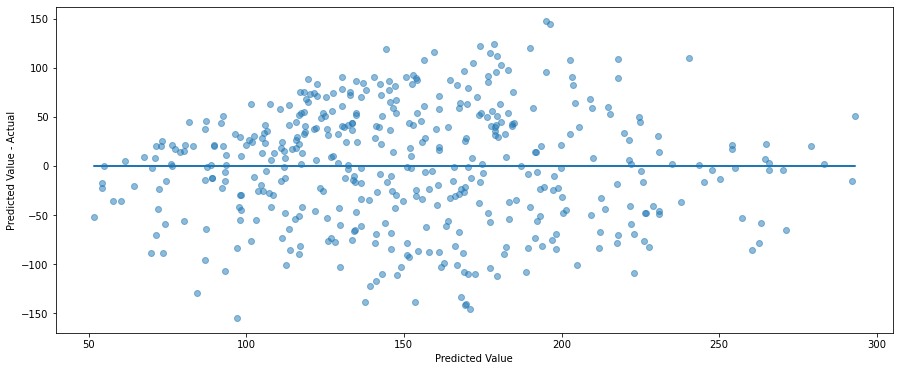

In [24]:
equal_var(model2, df.target)

### Multicolinearity 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

rows = df[["bmi", "bp"]].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(2)]
vif_df["feature"] = ["bmi", "bp"]

vif_df

,VIF,feature
0,1.18533,bmi
1,1.18533,bp


### Multi-colinearity Function

In [26]:
def vif(features_df):
    rows = features_df.values
    vif_df = pd.DataFrame()
    vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(features_df.shape[1])]
    vif_df["feature"] = features_df.columns
    return vif_df

In [27]:
vif(df[['bmi', 'bp']])

,VIF,feature
0,1.18533,bmi
1,1.18533,bp
